In [55]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("Aluminium Historical Data.csv")
df.head()

,Date,Price
0,2020-01-13,1798.0
1,2020-01-14,1809.0
2,2020-01-15,1801.0
3,2020-01-16,1812.0
4,2020-01-17,1805.0


In [59]:
df.tail()

,Date,Price
1882,2025-03-09,2608.05
1883,2025-03-10,2608.05
1884,2025-03-11,2608.05
1885,2025-03-12,2608.05
1886,2025-03-13,2608.05


In [61]:
all_business_days = pd.date_range(start='2020-01-02', end=pd.to_datetime("today"), freq='B')
print(all_business_days)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-02-28', '2025-03-03', '2025-03-04', '2025-03-05',
               '2025-03-06', '2025-03-07', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13'],
              dtype='datetime64[ns]', length=1356, freq='B')


In [63]:
df1 = df.iloc[:,[0,1]]
print(df1.head())

         Date   Price
0  2020-01-13  1798.0
1  2020-01-14  1809.0
2  2020-01-15  1801.0
3  2020-01-16  1812.0
4  2020-01-17  1805.0


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1887 non-null   object 
 1   Price   1887 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.6+ KB


In [68]:
import pandas as pd

df2 = df1.copy()

def parse_dates(date):
    for fmt in ("%Y-%m-%d", "%d-%m-%Y", "%d/%m/%Y"):
        try:
            return pd.to_datetime(date, format=fmt)
        except (ValueError, TypeError):
            pass
    return pd.NaT  # Correct indentation here

df1["Date"] = df1["Date"].apply(parse_dates)  # Fixed quotes


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1887 non-null   datetime64[ns]
 1   Price   1887 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.6 KB


In [72]:
merged_df1 = df1.copy()

In [74]:
################## adding misssing dates #############



start_date_row = merged_df1[merged_df1["Date"] == merged_df1["Date"].min()]
end_date_row = merged_df1[merged_df1["Date"] == merged_df1["Date"].max()]
# Generate full range of business days
start_date = merged_df1["Date"].min()
end_date = merged_df1["Date"].max()
full_business_days = pd.date_range(start=start_date, end=end_date, freq="B")  # 'B' means business days

# Reindex DataFrame to include missing business days
df_full = pd.DataFrame({"Date": full_business_days})
df_merged = df_full.merge(merged_df1, on="Date", how="left")  # Merge to keep all business days

df_merged["Is_Non_Business_Day"] = df_merged["Date"].dt.weekday >= 5  # Saturday=5, Sunday=6

# Filter only non-business day rows
non_business_days = df_merged[df_merged["Is_Non_Business_Day"]]

# Display the results
if not non_business_days.empty:
    print("Non-Business Days Found:")
    print(non_business_days[["Date"]])
else:
    print("All dates are business days!")


df_merged1 = df_merged.drop("Is_Non_Business_Day", axis=1)
df_merged1.info()

All dates are business days!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1349 non-null   datetime64[ns]
 1   Price   1349 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.2 KB


In [76]:
merged_df1 = merged_df1.ffill()


In [78]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1887 non-null   datetime64[ns]
 1   Price   1887 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.6 KB


In [80]:
# Remove commas and convert to numeric
merged_df1['Price'] = merged_df1['Price'].replace(',', '', regex=True).astype(float)

# Now compute the mean and median
mean_price = merged_df1['Price'].mean()
median_price = merged_df1['Price'].median()

print("Mean Price:", mean_price)
print("Median Price:", median_price)


Mean Price: 2349.804451510334
Median Price: 2370.0


In [82]:
variance = merged_df1['Price'].var()
print("Variance:", variance)


std_dev = merged_df1['Price'].std()
print("Standard Deviation:", std_dev)


skewness = merged_df1['Price'].skew()
print("Skewness:", skewness)


kurtosis = merged_df1['Price'].kurtosis()
print("Kurtosis:", kurtosis)



Variance: 170754.5732410436
Standard Deviation: 413.2246038670055
Skewness: 0.10743069217070753
Kurtosis: 0.38198802093025463


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

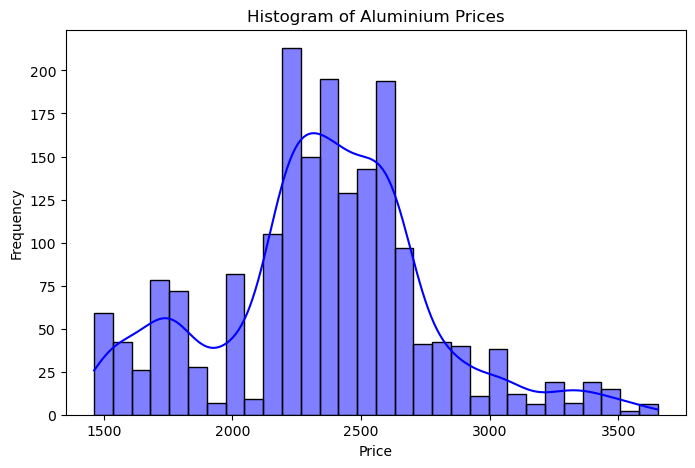

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')  # KDE adds a smooth curve
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Aluminium Prices")
plt.show()


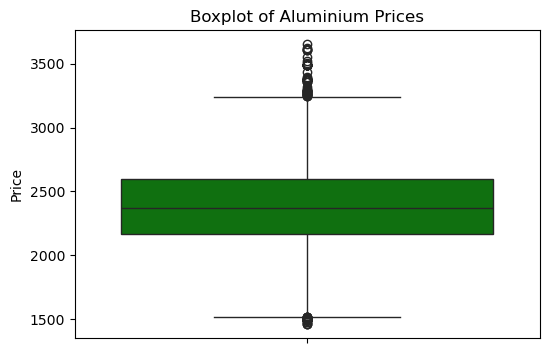

In [88]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Price'], color='green')
plt.ylabel("Price")
plt.title("Boxplot of Aluminium Prices")
plt.show()


In [ ]:
# Compute median price
median_price = df_outlier["Price"].median()

# Replace outliers with the median
df_outlier["Price"] = df_outlier["Price"].apply(lambda x: median_price if (x < lower_bound or x > upper_bound) else x)

# Save the updated dataset
cleaned_outlier_file = "/mnt/data/Aluminium_Historical_Data_No_Outliers.csv"
df_outlier.to_csv(cleaned_outlier_file, index=False)

# Provide the download link
cleaned_outlier_file

In [91]:
import pandas as pd

# Load dataset
df = pd.read_csv("Aluminium Historical Data.csv")

# Inspect the first few rows
print(df.head())

# Convert 'Date' column to datetime format, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Generate a complete range of business days
all_business_days = pd.date_range(start='2020-01-01', end=pd.to_datetime("today"), freq='B')

# Create a new DataFrame with all business days
full_df = pd.DataFrame({'Date': all_business_days})

# Merge with the original dataset
df_filled = full_df.merge(df, on='Date', how='left')

# Save the updated dataset
df_filled.to_csv("Aluminium_Historical_Data_Filled.csv", index=False)

print("Missing dates added, and file saved as 'Aluminium_Historical_Data_Filled.csv'")




         Date   Price
0  2020-01-13  1798.0
1  2020-01-14  1809.0
2  2020-01-15  1801.0
3  2020-01-16  1812.0
4  2020-01-17  1805.0
Missing dates added, and file saved as 'Aluminium_Historical_Data_Filled.csv'


C:\Users\User\AppData\Local\Temp\ipykernel_3196\3582582477.py:10: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


In [93]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1357 non-null   datetime64[ns]
 1   Price   1349 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.3 KB


In [ ]:
// here we used interpolation technique to remove outliers//

import pandas as pd
import numpy as np

# Load the dataset
file_path = "Aluminium_Historical_Data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Convert Price column to numeric (handling potential formatting issues)
df["Price"] = df["Price"].astype(str).str.replace(",", "").astype(float)

# Sort by Date to ensure proper interpolation
df =df.sort_values(by="Date")

# Calculate IQR for outlier detection
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN
df["Price"] = df["Price"].mask((df["Price"] < lower_bound) | (df["Price"] > upper_bound), np.nan)

# Apply linear interpolation to fill missing values (outliers)
df["Price"] = df["Price"].interpolate(method="linear")

# Save the updated dataset
df.to_csv("Aluminium_Historical_Data_Interpolated.csv", index=False)

print("Outliers removed using interpolation. Cleaned file saved.")


In [101]:

# after outliers replace

dd = pd.read_csv("Aluminium_Historical_Data_Interpolated.csv")
dd

,Date,Price
0,2020-01-13,1798.00
1,2020-01-14,1809.00
2,2020-01-15,1801.00
3,2020-01-16,1812.00
4,2020-01-17,1805.00
...,...,...
1882,2025-03-09,2608.05
1883,2025-03-10,2608.05
1884,2025-03-11,2608.05
1885,2025-03-12,2608.05


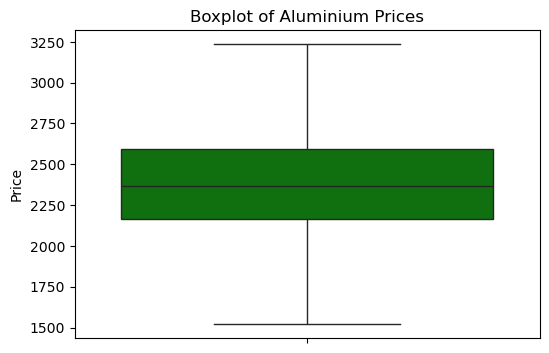

In [103]:
plt.figure(figsize=(6,4))
sns.boxplot(y=dd['Price'], color='green')
plt.ylabel("Price")
plt.title("Boxplot of Aluminium Prices")
plt.show()

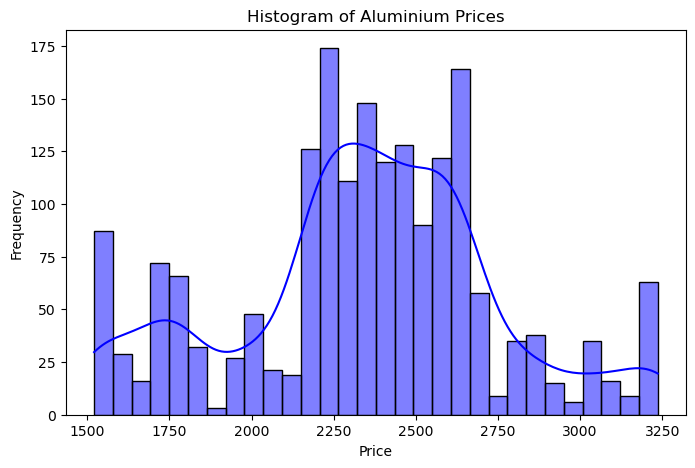

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(dd['Price'], bins=30, kde=True, color='blue')  # KDE adds a smooth curve
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Aluminium Prices")
plt.show()